In [960]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import erf
import math
from collections import Counter
from mlxtend.plotting import plot_decision_regions

In [961]:
df = pd.read_csv("/content/drive/MyDrive/famcs_students.csv")

In [962]:
N = 18
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
numeric_features = ['work_experience','social','sport','hostel',
                    'cource', 'group', 'age', 'height', 'foot_size', 'score', 'retake', 'miss']

In [963]:
y = binary_cols[N % 8]
y

'weekend_study'

In [964]:
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    df[col] = pd.factorize(df[col])[0]

print("DataFrame after converting object columns to numerical:")
print(df.head())
print("\nDataFrame Info after conversion:")
df.info()

DataFrame after converting object columns to numerical:
   cource  group  stream  sex   age  ss  interest  os  weekend_study  \
0       4     11       0    0  20.0   0         0   0              0   
1       4     11       0    1  20.0   0         1   0              1   
2       4     11       0    1  19.0   0         1   0              0   
3       4     11       0    1  20.0   0         0   0              0   
4       4     11       0    0  20.0   0         0   1              0   

   bad_sleep  ...  social  sport  miss  study_form  foot_size  eye_color  \
0          0  ...       0      0   3.0           0       48.0          0   
1          1  ...       0      1   5.0           0       39.0          1   
2          1  ...       0      2  10.0           0       41.0          0   
3          0  ...       0      1   3.0           0       36.0          0   
4          1  ...       1      2   1.0           0       46.0          1   

   score  retake  hostel  literature  
0    9.2       

In [965]:
all_features = [col for col in df.columns if col != 'weekend_study']

features_subset1 = ['cource', 'group', 'score', 'retake', 'miss']
features_subset2 = ['sex', 'age', 'height', 'foot_size', 'eye_color']
features_subset3 = ['interest', 'social', 'sport', 'anime', 'hostel']

print("All Features:", all_features)
print("\nFeatures Subset 1:", features_subset1)
print("Features Subset 2:", features_subset2)
print("Features Subset 3:", features_subset3)

All Features: ['cource', 'group', 'stream', 'sex', 'age', 'ss', 'interest', 'os', 'bad_sleep', 'glasses', 'work_experience', 'ai', 'height', 'anime', 'social', 'sport', 'miss', 'study_form', 'foot_size', 'eye_color', 'score', 'retake', 'hostel', 'literature']

Features Subset 1: ['cource', 'group', 'score', 'retake', 'miss']
Features Subset 2: ['sex', 'age', 'height', 'foot_size', 'eye_color']
Features Subset 3: ['interest', 'social', 'sport', 'anime', 'hostel']


In [966]:
dataframes['df_full'] = df[all_features]
dataframes['df_subset1'] = df[features_subset1]
dataframes['df_subset2'] = df[features_subset2]
dataframes['df_subset3'] = df[features_subset3]

for name, dataframe in dataframes.items():
    print(f"\nDataFrame: {name}")
    print(dataframe.head())
    print(f"\nInfo for DataFrame: {name}")
    dataframe.info()


DataFrame: df_full
   cource  group  stream  sex   age  ss  interest  os  bad_sleep  glasses  \
0       4     11       0    0  20.0   0         0   0          0        0   
1       4     11       0    1  20.0   0         1   0          1        0   
2       4     11       0    1  19.0   0         1   0          1        0   
3       4     11       0    1  20.0   0         0   0          0        0   
4       4     11       0    0  20.0   0         0   1          1        0   

   ...  social  sport  miss  study_form  foot_size  eye_color  score  retake  \
0  ...       0      0   3.0           0       48.0          0    9.2       0   
1  ...       0      1   5.0           0       39.0          1    8.8       0   
2  ...       0      2  10.0           0       41.0          0    8.8       0   
3  ...       0      1   3.0           0       36.0          0    8.8       0   
4  ...       1      2   1.0           0       46.0          1    9.0       0   

   hostel  literature  
0       0   

In [967]:
selected_features = features_subset3
y = df['weekend_study'].values
y=np.where(y == 0, 1, 0)
print(df[selected_features].info())
print(df[selected_features].head())
X = df[selected_features].values
counts = Counter(y)
print("Количество значений в целевой переменной:")
print(f"0: {counts[0]}; Доля 0: {counts[0] / len(y):.3f}")
print(f"1: {counts[1]}; Доля 1: {counts[1] / len(y):.3f}")
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1
X_normalized = (X - X_mean) / X_std

np.random.seed(42)

indices = np.arange(len(X_normalized))
np.random.shuffle(indices)

train_size = int(0.7 * len(indices))
val_size = int(0.15 * len(indices))

train_idx = indices[:train_size]
val_idx = indices[train_size:train_size + val_size]
test_idx = indices[train_size + val_size:]

X_train, y_train = X_normalized[train_idx], y[train_idx]
X_val, y_val = X_normalized[val_idx], y[val_idx]
X_test, y_test = X_normalized[test_idx], y[test_idx]

print(f"Размеры выборок: train={len(X_train)}, val={len(X_val)}, test={len(X_test)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   interest  127 non-null    int64
 1   social    127 non-null    int64
 2   sport     127 non-null    int64
 3   anime     127 non-null    int64
 4   hostel    127 non-null    int64
dtypes: int64(5)
memory usage: 5.1 KB
None
   interest  social  sport  anime  hostel
0         0       0      0      0       0
1         1       0      1      0       0
2         1       0      2      0       0
3         0       0      1      0       0
4         0       1      2      0       0
Количество значений в целевой переменной:
0: 28; Доля 0: 0.220
1: 99; Доля 1: 0.780
Размеры выборок: train=88, val=19, test=20


# 0. Тривиальный классификатор

In [968]:
class TrivialClassifier:
    def __init__(self):
        self.most_common_class = None

    def fit(self, X, y):
        counts = Counter(y)
        self.most_common_class = counts.most_common(1)[0][0]
        return self

    def predict(self, X):
        if self.most_common_class is None:
            raise ValueError("First call fit()")
        return np.full(len(X), self.most_common_class)

    def predict_proba(self, X):
        return np.full(len(X), 1.0 if self.most_common_class == 1 else 0.0)

In [969]:
trivial_model = TrivialClassifier()
trivial_model.fit(X_train, y_train)

# 1. Наивный байесовский классификатор

https://habr.com/ru/articles/802435/
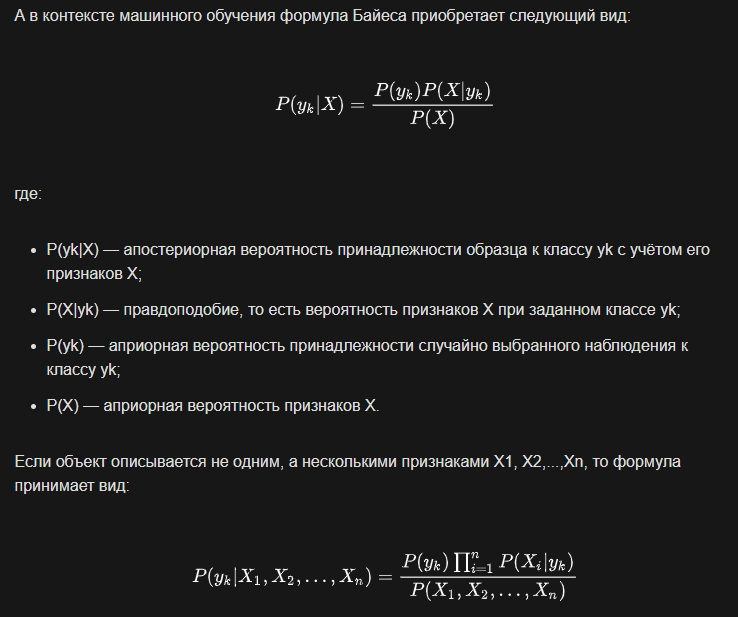
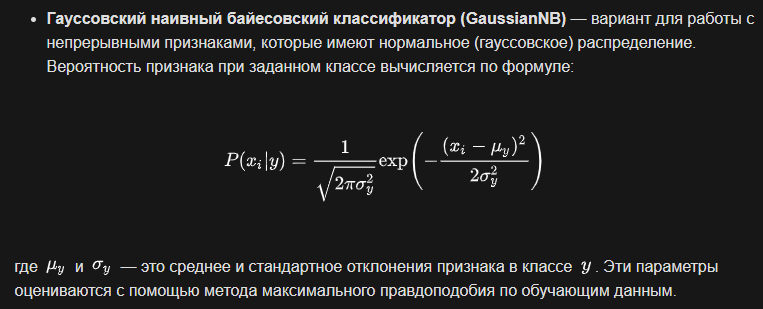
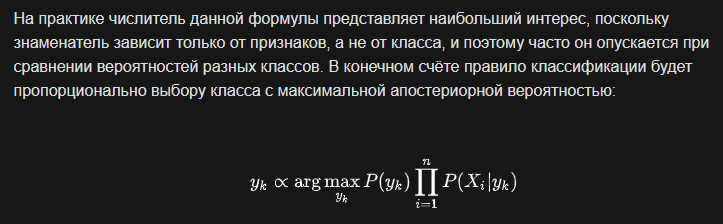
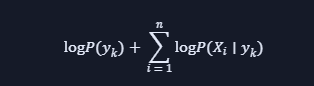

In [970]:
class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_priors = {}
        self.class_means = {}
        self.class_vars = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y == c]
            self.class_priors[c] = len(X_c) / len(X)
            self.class_means[c] = X_c.mean(axis=0)
            self.class_vars[c] = X_c.var(axis=0) + 1e-6
        return self

    def pdf(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def predict(self, X):
        preds = []
        for x in X:
            posteriors = {}
            for c in self.classes:
                prior = np.log(self.class_priors[c])
                likelihoods = np.sum(np.log(self.pdf(x, self.class_means[c], self.class_vars[c])))
                posteriors[c] = prior + likelihoods
            preds.append(max(posteriors, key=posteriors.get))
        return np.array(preds)
    def predict_proba(self, X):
        probs = []
        for x in X:
            class_scores = []
            for c in self.classes:
               prior = np.log(self.class_priors[c])
               likelihoods = np.sum(np.log(self.pdf(x, self.class_means[c], self.class_vars[c]) + 1e-12))
               score = prior + likelihoods
               class_scores.append(score)
            exp_scores = np.exp(class_scores - np.max(class_scores))
            normalized = exp_scores / exp_scores.sum()
            probs.append(normalized[1])
        return np.array(probs)

In [971]:
baes_model = NaiveBayesClassifier()
baes_model.fit(X_train, y_train)

In [972]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

# 2. Метод k-ближайших соседей
https://habr.com/ru/articles/801885/

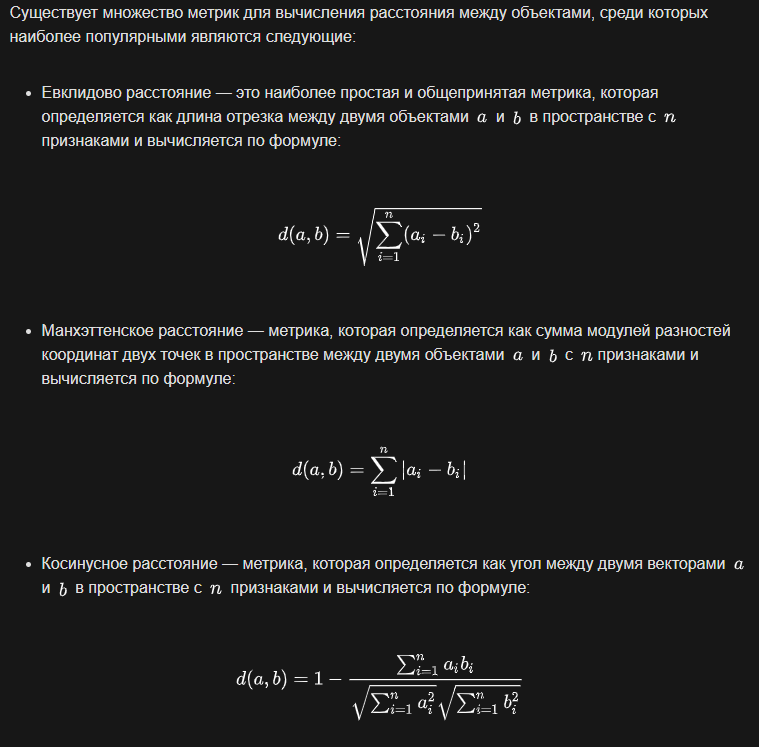

In [973]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train
        return self

    def _euclidean_distances(self, x_test_i):
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)
        k_nearest_indexes = np.argsort(distances)[:self.k]
        targets = self.y_train[k_nearest_indexes]

        return Counter(targets).most_common(1)[0][0]

    def predict_proba(self, X):
        probs = []
        for x in X:
            distances = self._euclidean_distances(x)
            k_idx = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_idx]
            proba_class1 = np.mean(k_labels == 1)
            probs.append(proba_class1)
        return np.array(probs)

    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])

In [974]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

best_k, best_score = None, -np.inf
scores = []
for k in range(1, 10):
    knn = KNNClassifier(k=k).fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    score = accuracy(y_val, y_val_pred)
    scores.append((k, score))
    if score > best_score:
        best_k, best_score = k, score

print(f"Лучший k={best_k}, accuracy={best_score:.4f}")

Лучший k=3, accuracy=0.8421


In [975]:
knn_model = KNNClassifier(k=best_k)
knn_model.fit(X_train, y_train)

# 3. Логистическая регрессия
https://habr.com/ru/articles/803397/

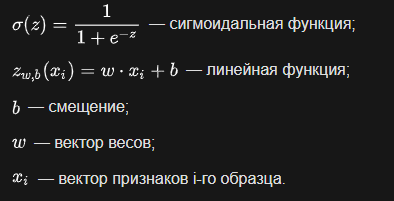
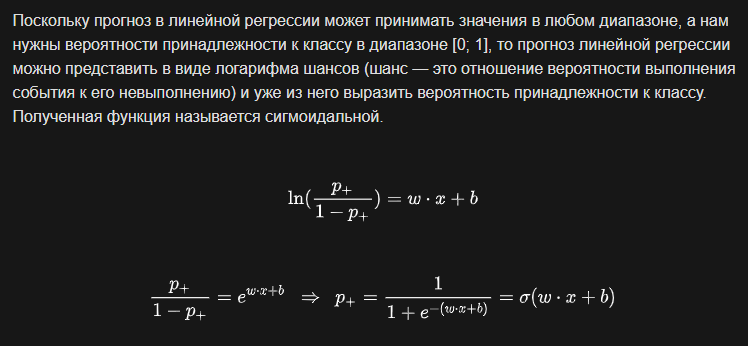
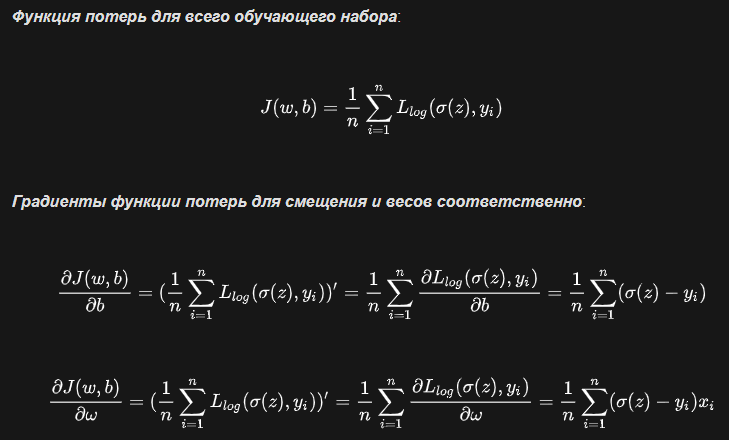
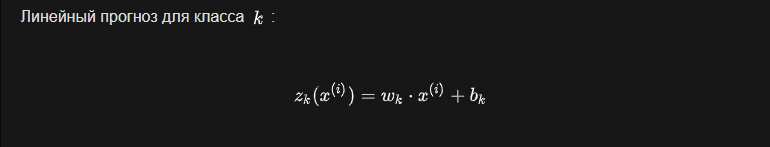
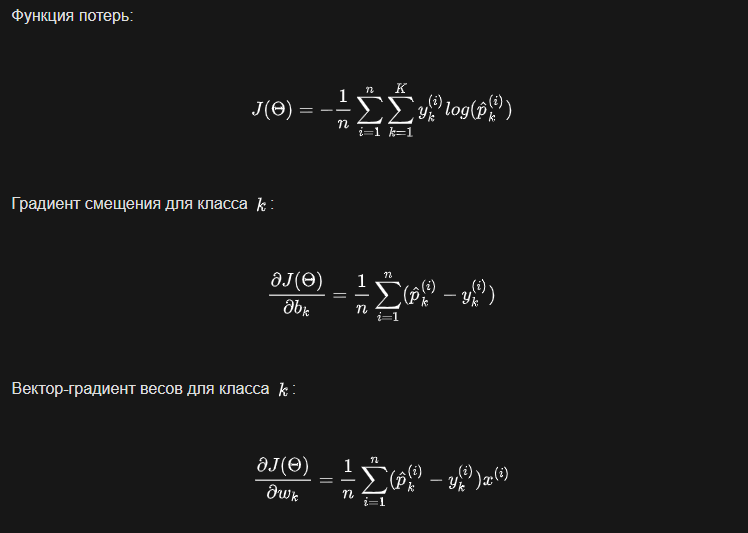

In [976]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, threshold=0.0001, max_iter=1000):
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias, self.weights = 0, np.zeros(n_features)
        previous_db, previous_dw = 0, np.zeros(n_features)

        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_sigmoid = self._sigmoid(y_pred_linear)
            # ∂L/∂w = 1/n × X^T × (p - y)
            # ∂L/∂b = 1/n × Σ(p - y)
            db = 1 / n_samples * np.sum(y_pred_sigmoid - y)
            dw = 1 / n_samples * X.T @ (y_pred_sigmoid - y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction < self.threshold:
                if abs_dw_reduction.all() < self.threshold:
                    break

            previous_db = db
            previous_dw = dw

    def predict_proba(self, X):
        y_pred_linear = X @ self.weights + self.bias # z
        return self._sigmoid(y_pred_linear)

    def predict(self, X_test):
        y_pred_sigmoid = self.predict_proba(X_test)
        return np.array([0 if pred < 0.7 else 1 for pred in y_pred_sigmoid]) #classes

In [977]:
logistic_model = LogisticRegression(learning_rate=0.001, threshold=0.00001, max_iter=1000000)
logistic_model.fit(X_train, y_train)

In [978]:
def calculate_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def calculate_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def calculate_f1(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

Оптимальный порог: 0.000, F1 на валидации: 0.914


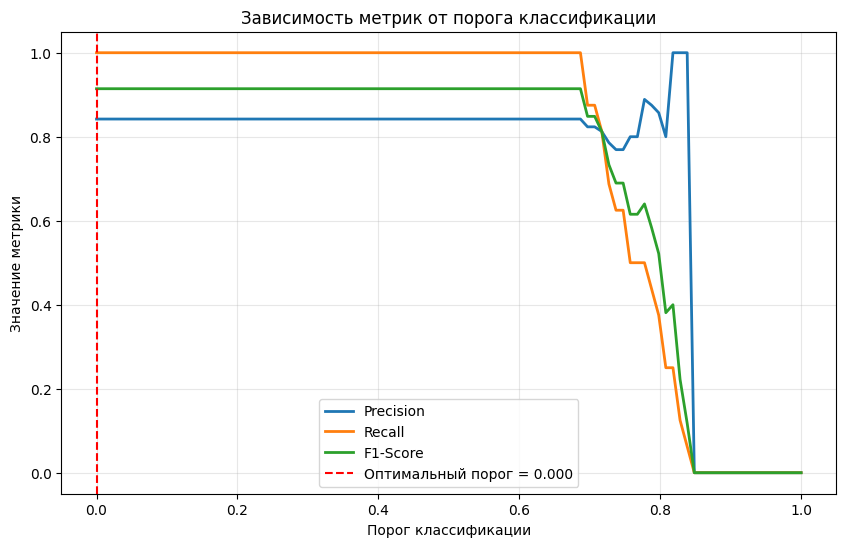

In [979]:
thresholds = np.linspace(0, 1, 100)
precisions, recalls, f1_scores = [], [], []

y_val_proba = logistic_model.predict_proba(X_val)

for threshold in thresholds:
    y_pred = (y_val_proba >= threshold).astype(int)
    precisions.append(calculate_precision(y_val, y_pred))
    recalls.append(calculate_recall(y_val, y_pred))
    f1_scores.append(calculate_f1(y_val, y_pred))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Оптимальный порог: {best_threshold:.3f}, F1 на валидации: {best_f1:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', linewidth=2)
plt.plot(thresholds, recalls, label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores, label='F1-Score', linewidth=2)
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Оптимальный порог = {best_threshold:.3f}')
plt.xlabel('Порог классификации')
plt.ylabel('Значение метрики')
plt.title('Зависимость метрик от порога классификации')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Оценка качества

https://habr.com/ru/articles/821547/

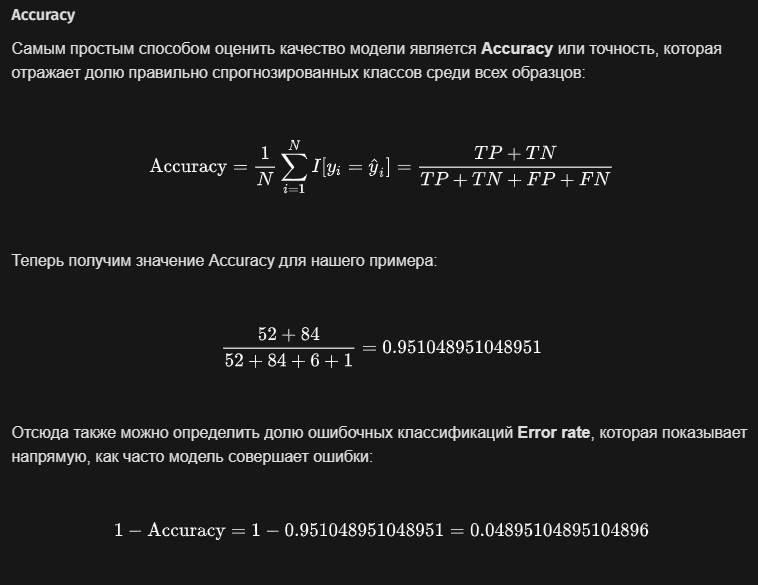
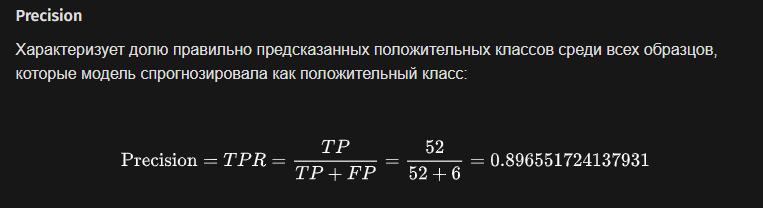
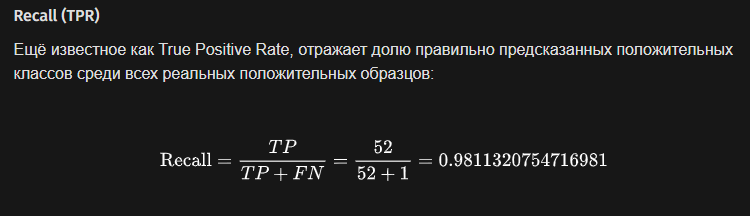
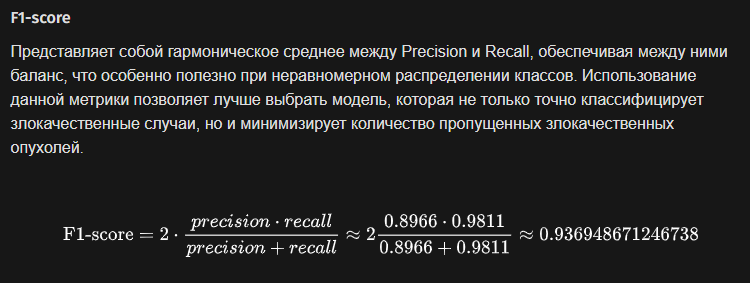
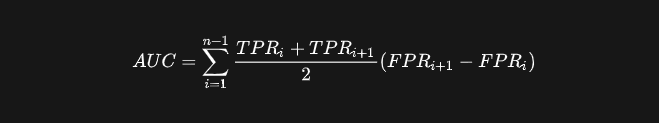

In [980]:
def calculate_roc_auc(y_true, y_proba):
    sorted_idx = np.argsort(y_proba)[::-1]
    y_true_sorted = y_true[sorted_idx]

    n_pos = np.sum(y_true == 1)
    n_neg = np.sum(y_true == 0)

    tpr = []
    fpr = []

    for i in range(len(y_true) + 1):
        tp = np.sum(y_true_sorted[:i] == 1)
        fp = np.sum(y_true_sorted[:i] == 0)

        tpr.append(tp / n_pos if n_pos > 0 else 0)
        fpr.append(fp / n_neg if n_neg > 0 else 0)

    auc = 0
    for i in range(1, len(tpr)):
        auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2

    return auc

def confusion_matrixMy(y_true, y_pred):
    matrix = np.zeros((2, 2), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true, pred] += 1
    return matrix


=== Trivial Classifier ===
Accuracy : 0.850
Precision: 0.850
Recall   : 1.000
ROC-AUC  : 0.451


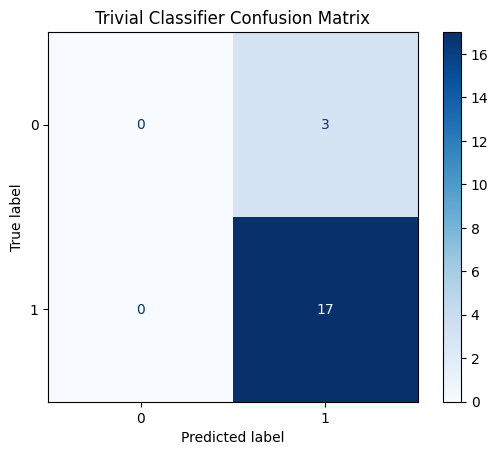


=== Naive Bayes ===
Accuracy : 0.850
Precision: 0.850
Recall   : 1.000
ROC-AUC  : 0.353


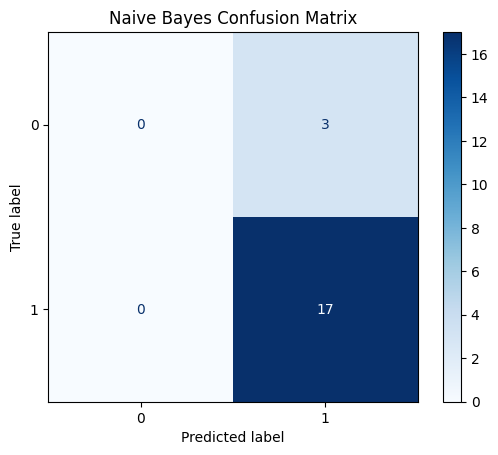


=== KNN ===
Accuracy : 0.800
Precision: 0.882
Recall   : 0.882
ROC-AUC  : 0.510


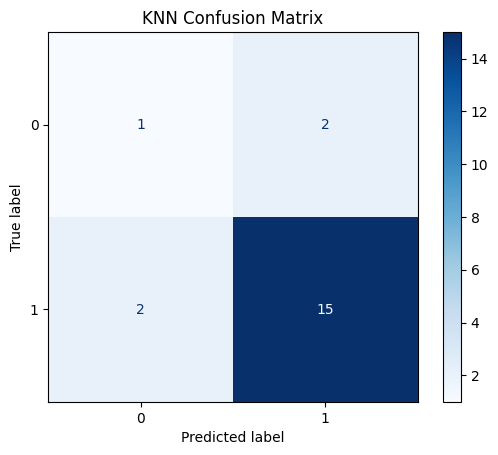


=== Logistic Regression ===
Accuracy : 0.750
Precision: 0.833
Recall   : 0.882
ROC-AUC  : 0.431


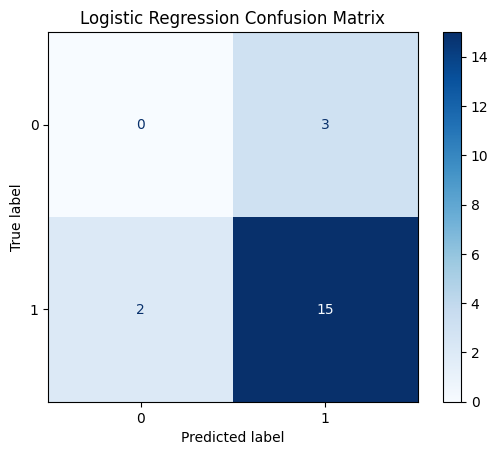

In [981]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
model_metrics = []
def evaluate_model(model, X_test, y_test, model_name, threshold = 0):
    y_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)

    acc = accuracy(y_test, y_pred)
    prec = calculate_precision(y_test, y_pred)
    rec = calculate_recall(y_test, y_pred)
    roc_auc = calculate_roc_auc(y_test, y_proba)

    print(f"\n=== {model_name} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"ROC-AUC  : {roc_auc:.3f}")

    cm = confusion_matrixMy(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    model_metrics.append({
        'name': model_name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'roc_auc': roc_auc
    })

# Trivial
evaluate_model(trivial_model, X_test, y_test, "Trivial Classifier")

# Naive Bayes
evaluate_model(baes_model, X_test, y_test, "Naive Bayes")

# KNN
evaluate_model(knn_model, X_test, y_test, "KNN")

# Logistic Regression
evaluate_model(logistic_model, X_test, y_test, "Logistic Regression", threshold=best_threshold)


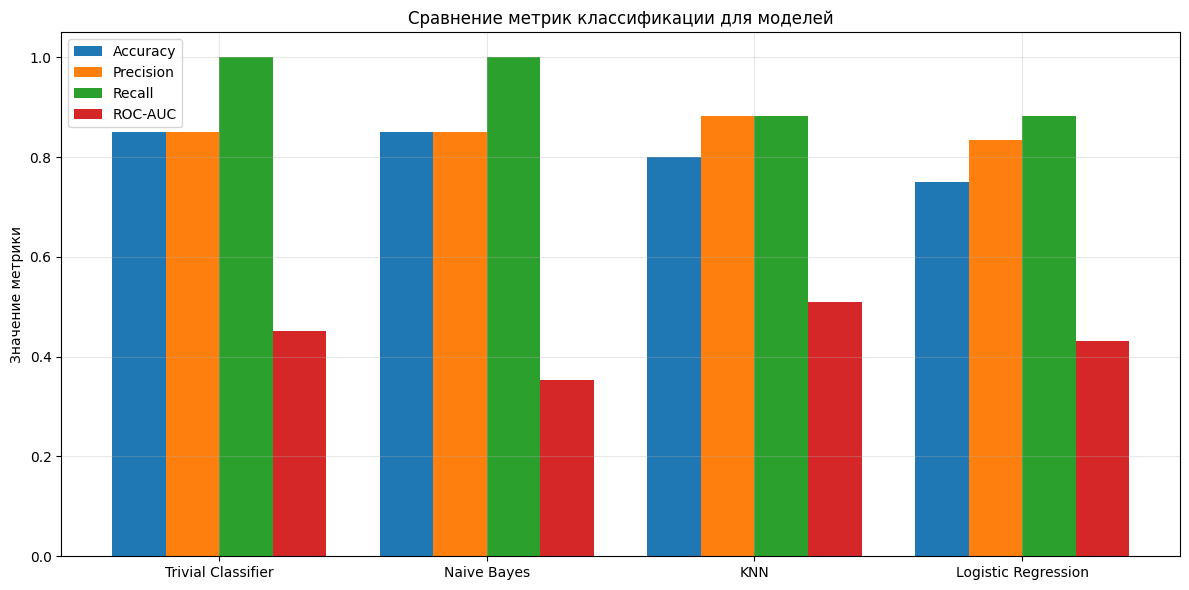

In [982]:
model_names = [m['name'] for m in model_metrics]
accuracies = [m['accuracy'] for m in model_metrics]
precisions = [m['precision'] for m in model_metrics]
recalls = [m['recall'] for m in model_metrics]
roc_aucs = [m['roc_auc'] for m in model_metrics]

x = np.arange(len(model_names))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5*width, precisions, width, label='Precision')
plt.bar(x + 0.5*width, recalls, width, label='Recall')
plt.bar(x + 1.5*width, roc_aucs, width, label='ROC-AUC')

plt.xticks(x, model_names)
plt.ylabel('Значение метрики')
plt.title('Сравнение метрик классификации для моделей')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()